# What are the most serious meteorological disasters in the United States?

![A photo of a tornado](data/images/tornado.jpg)

## Introduction

**Business Context.** While natural *events* often cannot be avoided, the risks they present can be managed, either by mitigation, avoidance, or insurance, in order to prevent them from becoming natural *disasters*. The consultancy firm you work for has been hired by an independent advocacy group that wants to conduct an analysis of the US emergency management system of preparedness, protection, mitigation, response, and recovery, with the purpose of proposing legislative reforms to make it more effective and financially efficient. Their ultimate goal is to help increase the government's ability to prevent disasters from happening and reduce the negative impact of those that cannot be completely avoided.

**Business Problem.** Your client would like to know which storm event types are more likely to become disasters, and in which locations, as measured by the number of deaths, injuries, and economic damage they cause. Additionally, they would like to conduct a preliminary assessment of whether the [Post-Katrina Emergency Management Reform Act of 2006](https://www.congress.gov/bill/109th-congress/senate-bill/3721) had any impact on the severity of the disasters that occurred after the bill was signed. This Act centralized the US emergency management under the coordination of the Federal Emergency Management Agency (FEMA) as a response to the enormous human and material losses that were caused by Hurricane Katrina in August 2005.

**Analytical Context.** You have been provided with a compressed GZIP file of storm events from 1970 to 2020 as recorded by the US [National Oceanic and Atmospheric Administration](https://www.ncdc.noaa.gov/stormevents/ftp.jsp). You can check the [documentation](https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Bulk-csv-Format.pdf) for more information.

In [1]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pingouin as pg

## Loading in the dataset

Let's load in the dataset. We add the `parse_dates` argument to tell pandas which columns should be interpreted as dates.

In [2]:
df = pd.read_csv("data/dataset.csv.gz", parse_dates=["BEGIN_DATE_TIME", "END_DATE_TIME"])
df.head()

,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,BEGIN_DATE_TIME,BEGIN_YEAR,CZ_TIMEZONE,END_DATE_TIME,TOR_F_SCALE,BEGIN_LOCATION,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,TOTAL_DEATHS,TOTAL_INJURIES,TOTAL_DAMAGE_DEFLATED
0,NaN,9987739,COLORADO,hail,1983-07-22 16:40:00,1983.0,CST,1983-07-22 16:40:00,NaN,NaN,NaN,39.72,-104.60,NaN,NaN,0,0,0.0
1,NaN,9987740,COLORADO,hail,1983-07-22 16:45:00,1983.0,CST,1983-07-22 16:45:00,NaN,NaN,NaN,39.73,-104.87,NaN,NaN,0,0,0.0
2,NaN,9987741,COLORADO,hail,1983-07-22 16:45:00,1983.0,CST,1983-07-22 16:45:00,NaN,NaN,NaN,39.73,-104.93,NaN,NaN,0,0,0.0
3,NaN,9987735,COLORADO,hail,1983-07-22 16:20:00,1983.0,CST,1983-07-22 16:20:00,NaN,NaN,NaN,39.73,-104.85,NaN,NaN,0,0,0.0
4,NaN,9987736,COLORADO,hail,1983-07-22 16:25:00,1983.0,CST,1983-07-22 16:25:00,NaN,NaN,NaN,39.72,-104.82,NaN,NaN,0,0,0.0


In [3]:
df.sort_values('BEGIN_DATE_TIME')

,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,BEGIN_DATE_TIME,BEGIN_YEAR,CZ_TIMEZONE,END_DATE_TIME,TOR_F_SCALE,BEGIN_LOCATION,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,TOTAL_DEATHS,TOTAL_INJURIES,TOTAL_DAMAGE_DEFLATED
11105,NaN,10029788,LOUISIANA,thunderstorm wind,1970-01-05 21:30:00,1970.0,CST,1970-01-05 21:30:00,NaN,NaN,NaN,29.08,-90.18,NaN,NaN,0,0,0.000000
9889,NaN,9999346,FLORIDA,tornado,1970-01-06 09:05:00,1970.0,CST,1970-01-06 09:05:00,F1,NaN,NaN,27.73,-82.42,NaN,NaN,0,2,64432.989691
9915,NaN,9999347,FLORIDA,tornado,1970-01-06 09:15:00,1970.0,CST,1970-01-06 09:15:00,F2,NaN,NaN,27.73,-82.43,NaN,NaN,0,3,64432.989691
9916,NaN,9999348,FLORIDA,thunderstorm wind,1970-01-06 09:40:00,1970.0,CST,1970-01-06 09:40:00,NaN,NaN,NaN,28.00,-81.90,NaN,NaN,0,0,0.000000
9917,NaN,9999349,FLORIDA,thunderstorm wind,1970-01-06 09:45:00,1970.0,CST,1970-01-06 09:45:00,NaN,NaN,NaN,27.88,-81.78,NaN,NaN,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110435,2061475.0,5592528,NEW YORK,high wind,NaT,NaN,EST,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
2110436,2062241.0,5592642,OKLAHOMA,hail,NaT,NaN,CST,NaT,NaN,PERRY,PERRY,36.30,-97.28,36.30,-97.28,0,0,NaN
2110437,2062242.0,5592643,TEXAS,hail,NaT,NaN,CST,NaT,NaN,ARCHER CITY,ARCHER CITY,33.70,-98.63,33.70,-98.63,0,0,NaN
2110438,2062239.0,5592640,OKLAHOMA,hail,NaT,NaN,CST,NaT,NaN,VANCE AFB,VANCE AFB,36.33,-97.90,36.33,-97.90,0,0,NaN


Here is a description of the imported columns:

1. **EPISODE_ID**: The storm episode ID. A single episode can contain multiple events
2. **EVENT_ID**: This is the ID of the actual storm as such. Several storms can be grouped into an episode
3. **STATE**: The state or region where the event occurred
4. **EVENT_TYPE**: The type of the event
5. **BEGIN_DATE_TIME**: The date and time when the event started. Times and dates are in LST (Local Solar Time), which means that they reflect the local time, not a coordinated time
6. **BEGIN_YEAR**: The year in which the event begun
7. **CZ_TIMEZONE**: The timezone of the place where the event occurred
8. **END_DATE_TIME**: The date and time when the event ended. Times and dates are in LST (Local Solar Time), which means that they reflect the local time, not a coordinated time
9. **TOR_F_SCALE**: The [enhanced Fujita scale](https://en.wikipedia.org/wiki/Enhanced_Fujita_scale) (highest recorded value). This scale measures the strength of a tornado based on the amount of damage that it caused. A level of `EF0` means "light damage" (wind speeds of 40 - 72 mph), and a level of `EF5` means "incredible damage" (261 - 318 mph). `EFU` means "Unknown"
10. **BEGIN_LOCATION**: The name of the city or village where the event started
11. **END_LOCATION**: The name of the city or village where the event ended
12. **BEGIN_LAT**: The latitude of the place where the event begun
13. **BEGIN_LON**: The longitude of the place where the event begun
14. **END_LAT**: The latitude of the place where the event ended
15. **END_LON**: The longitude of the place where the event ended
16. **TOTAL_DEATHS**: Deaths directly or indirectly attributable to the event
17. **TOTAL_INJURIES**: Injuries directly or indirectly attributable to the event
18.  **TOTAL_DAMAGE_DEFLATED**: Estimated damage to property and crops in dollars. These dollars are "real" dollars, which means that the damages for all the years have been converted ([deflated](https://faculty.fuqua.duke.edu/~rnau/Decision411_2007/411infla.htm)) to the value they would have had in 1982-84. This was done to make the damages comparable across years, since dollars [change purchasing power every year](https://www.insider.com/fast-food-burgers-cost-every-year-2018-9) due to inflation. The deflation was done using the Bureau of Labor Statistics Urban Consumer Price Index, whose base period is 1982-84.

## Exploratory data analysis (EDA)

### Exercise 1

A good first step in EDA is visualizing the univariate distributions of each feature in the dataset. Here's a numbered list of the columns:

| Number 	| Column name 	|
|-	|-	|
| 1 	| STATE 	|
| 2 	| EVENT_TYPE 	|
| 3 	| BEGIN_DATE_TIME 	|
| 4 	| BEGIN_YEAR 	|
| 5 	| CZ_TIMEZONE 	|
| 6 	| END_DATE_TIME 	|
| 7 	| TOR_F_SCALE 	|
| 8 	| BEGIN_LOCATION 	|
| 9 	| END_LOCATION 	|
| 10 	| BEGIN_LAT 	|
| 11 	| BEGIN_LON 	|
| 12 	| END_LAT 	|
| 13 	| END_LON 	|
| 14 	| TOTAL_DEATHS 	|
| 15 	| TOTAL_INJURIES 	|
| 16 	| TOTAL_DAMAGE_DEFLATED 	|

Modify the function below to indicate which visualizations are well-suited to exploring the univariate distributions of each one of the columns. Append the number of the feature to the corresponding list.

Some things to keep in mind:

1. Please provide visualization choices for *each* of the features.
2. If you believe that a visualization doesn't apply to any of the columns, simply leave it as an empty list.
3. A single feature can be added to more than one visualization's corresponding list.

In [4]:
df.dtypes

EPISODE_ID                      float64
EVENT_ID                          int64
STATE                            object
EVENT_TYPE                       object
BEGIN_DATE_TIME          datetime64[ns]
BEGIN_YEAR                      float64
CZ_TIMEZONE                      object
END_DATE_TIME            datetime64[ns]
TOR_F_SCALE                      object
BEGIN_LOCATION                   object
END_LOCATION                     object
BEGIN_LAT                       float64
BEGIN_LON                       float64
END_LAT                         float64
END_LON                         float64
TOTAL_DEATHS                      int64
TOTAL_INJURIES                    int64
TOTAL_DAMAGE_DEFLATED           float64
dtype: object

In [5]:
def visualization_choice():
    """
    Returns the answer to exercise 1.
    
    Example:
    Let's say you want to add features 1 and 16 to `barplot`. Just
    add the numbers to the list. In other words, the line should
    be `barplot = [1,16]`.
    """
    
    # HISTOGRAMS
    histogram = [3,4,6,10,11,12,13,14,15,16]
    
    # BAR PLOTS
    barplot = [2,3,4,5,6,7]
    
    # BOX PLOTS
    boxplot = [3,4,6,10,11,12,13,14,15,16]
    
    # GEO HEAT MAP
    geoheatmap = [1,8,9,10,11,12,13]
    
    # LINE PLOT
    lineplot = [14,15,16]
    
    # DENSITY PLOT
    densityplot = [3,4,6,10,11,12,13,14,15,16]
    
    # YOUR CODE HERE
    visualization_choices = {
        "histogram":histogram,
        "barplot":barplot,
        "boxplot":boxplot,
        "geoheatmap":geoheatmap,
        "lineplot":lineplot,
        "densityplot":densityplot
    }
    
    return visualization_choices

visualization_choice()

{'histogram': [3, 4, 6, 10, 11, 12, 13, 14, 15, 16],
 'barplot': [2, 3, 4, 5, 6, 7],
 'boxplot': [3, 4, 6, 10, 11, 12, 13, 14, 15, 16],
 'geoheatmap': [1, 8, 9, 10, 11, 12, 13],
 'lineplot': [14, 15, 16],
 'densityplot': [3, 4, 6, 10, 11, 12, 13, 14, 15, 16]}

### Exercise 2

#### 2.1

As discussed in the regular cases, it is important to compute summary statistics for each feature. We know that the damage caused by natural disasters usually has a distribution that is very skewed to the right. Which TWO of the following summary statistics would be MOST useful to confirm that this is the case for the `TOTAL_DEATHS`, `TOTAL_INJURIES`, and `TOTAL_DAMAGE_DEFLATED` columns?
<ul>
A. Count<br>
B. Mean<br>
C. Minimum<br>
D. Maximum<br>
E. 25th percentile<br>
F. Median<br>
G. 75th percentile<br>
</ul>

In [6]:
def summary_choice():
    """
    Returns the two options you chose.
    
    Uncomment the lines that correspond to your choice.
    """
    
    A = df.groupby(["EVENT_TYPE"])[["TOTAL_DEATHS", "TOTAL_INJURIES", "TOTAL_DAMAGE_DEFLATED"]].count()
    B = df.groupby(["EVENT_TYPE"])[["TOTAL_DEATHS", "TOTAL_INJURIES", "TOTAL_DAMAGE_DEFLATED"]].mean()
    C = df.groupby(["EVENT_TYPE"])[["TOTAL_DEATHS", "TOTAL_INJURIES", "TOTAL_DAMAGE_DEFLATED"]].min()
    D = df.groupby(["EVENT_TYPE"])[["TOTAL_DEATHS", "TOTAL_INJURIES", "TOTAL_DAMAGE_DEFLATED"]].max()
    E = df.groupby(["EVENT_TYPE"])[["TOTAL_DEATHS", "TOTAL_INJURIES", "TOTAL_DAMAGE_DEFLATED"]].quantile(0.25)
    F = df.groupby(["EVENT_TYPE"])[["TOTAL_DEATHS", "TOTAL_INJURIES", "TOTAL_DAMAGE_DEFLATED"]].quantile(0.5)
    G = df.groupby(["EVENT_TYPE"])[["TOTAL_DEATHS", "TOTAL_INJURIES", "TOTAL_DAMAGE_DEFLATED"]].quantile(0.75)
    
    
    answer = {}
    #answer["A"] = A
    answer["B"] = B
    #answer["C"] = C
    #answer["D"] = D
    #answer["E"] = E
    answer["F"] = F
    #answer["G"] = G
    
    # YOUR CODE HERE

    
    return answer

#### 2.2

Inspect the tables of the two summary statistics you chose. What can you interpret from your results?

**Note:** In this and all similar subsequent exercises, please answer in the cell that is immediately below this one (if you write in the same cell as the question, your answer will not be recorded).


Looking at the tables from the mean and median of `TOTAL_DEATHS`, `TOTAL_INJURIES` and `TOTAL_DAMAGE_DEFLATED` by `EVENT_TYPE` we can see that in terms of the distribution of the data there is a clear evidence that all of the variables are right-skewed. In most of the cases, the value of the median is to the left of that of the mean —and even takes the value of 0 in many events—, meaning that there is a long tail in the distribution of each variable. Furthermore, we could also say that the most devastating events by far are the tornadoes, in terms of injuries, damage and deaths.  

### Exercise 3


Let's now look at some bivariate distributions. This is a pair plot of some of the numeric variables of the dataset:

![Pairplot](data/images/pairplot.png)

What useful insights can you gather from the plot?


There is several useful information that we can extract from the bivariate distribution plots. First of all, when analyzing the location variables (i.e. `BEGIN_LAT`,`BEGIN_LON`,`END_LAT` and `END_LON`) we could see that there are some outliers that could correspond to errors in the data. Since the information is from the USA, the range of latitude and longitude, at least for the beginning values, should be approximately between (20;65) and (-160;-68), respectively. In this sense, the data points below or above those values should be treated as outliers.

We could say that during the current millennium it seems that the number of events have increased, as we can see in the plot of the variables analyzed after 2000. **However, it is important to keep in mind that this change could also be the result of the addition of new events in the dataset that were not recorded before**. On the other hand, we can also see that the majority of events begin and end at the same location by looking at the 45 degree line that is formed in some of the location plots.

Another useful insight from the plots is that, by far, the most catastrophic event occurred in 2005 when the Katrina storm hit the country. During this year the `TOTAL_DEATHS`,`TOTAL_INJURIES` and `TOTAL_DAMAGE_DEFLATED` reached their maximum values, and from that point onward it appears that the variability of the variables has increased, but the figures are smaller than during 2005. As mentioned before, this could be attributed to new reports in the dataset that weren't included before.

Finally, when analyzing the relationship between these last variables and the location ones, we could see a clear concentration in a specific area of the country. In terms of latitude and longitude, the greater number of deaths, injuries and damages are in the (20;40) and (-100;-110) region, which, insome cases, correspond to regions near the sea.

### Exercise 4

Some storm events have a wider risk area than others, which can make them more worthy of attention for authorities. Which of these visualization strategies could be useful to find patterns related to the size of the risk area around storm events? Append the letters of all options that apply to the `answer` list in the function below.

&nbsp;&nbsp;&nbsp;&nbsp; A. A scatter plot of `BEGIN_LAT` vs. `END_LAT`<br>
&nbsp;&nbsp;&nbsp;&nbsp; B. A scatter plot of `BEGIN_LON` vs. `END_LON`<br>
&nbsp;&nbsp;&nbsp;&nbsp; C. A geographic heat map of the count of `BEGIN_LOCATION` per event<br>
&nbsp;&nbsp;&nbsp;&nbsp; D. A grouped geographic scatterplot of those events whose `BEGIN_LOCATION` and `END_LOCATION` do not coincide (in one color) vs. those in which they do coincide (in another color). (A geographic scatterplot is a scatterplot layered on top of a map, with the $x$- and $y$-coordinates being the longitude and the latitude of each point - see some examples [here](https://plotly.com/python/scatter-plots-on-maps/).)

In [7]:
def geo_spread():
    """
    Returns the selected answer
    """
    
    answer = []
    
    # YOUR CODE HERE
    
    
    answer.append(["A"])
    answer.append(["B"])
    #answer.append(["C"])
    answer.append(["D"])
    
    return answer

### Exercise 5

#### 5.1

Plot one (or more) of your choices from the previous exercise.

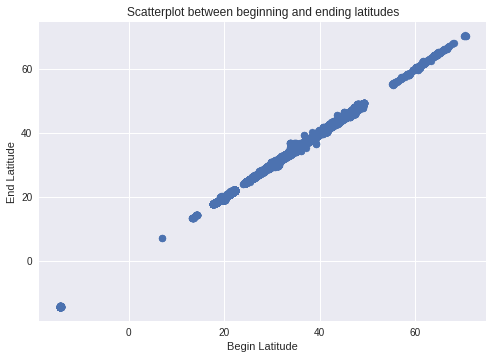

In [8]:
plt.style.use('seaborn')
plt.scatter(df['BEGIN_LAT'],df['END_LAT'])
plt.title('Scatterplot between beginning and ending latitudes')
plt.xlabel('Begin Latitude')
plt.ylabel('End Latitude');

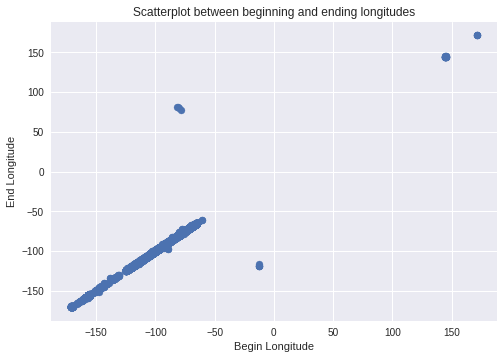

In [9]:
plt.scatter(df['BEGIN_LON'],df['END_LON'])
plt.title('Scatterplot between beginning and ending longitudes')
plt.xlabel('Begin Longitude')
plt.ylabel('End Longitude');

#### 5.2

Write down your findings in the cell below.


As stated on **exercise 3**, when analyzing the location variables we could see that there are some data points that could correspond to errors in the database. Since the information is from the USA, the range of latitude and longitude, at least for the beginning values, should be approximately between (20;65) and (-160;-68), respectively. In this sense, the data points below or above those values should be treated as outliers and this plots let us identify some of those potential errors.

In terms of the which storm events could have a wider risk area than others, we could see that the vast majority of them begin and end at the same locations, which is captured by the 45 degree line on the scatterplots. Anything above or below the diagonal, after controlling for outliers, gives us insights about the which events are more worthy of attention for authorities.

### Exercise 6

In the context of natural disaster management, risk is defined as the probability of an event happening times the hazard that its occurrence may pose (that is, the potential damages that could happen if the event takes place):

$$Risk = Probability \times Hazard$$

The estimation of risk is part of what is sometimes called "risk assessment". 

Since we are still in the exploratory phase, we do not want to start modeling right away. We would like to rely on plots and visualizations instead.

Describe a data visualization strategy that includes metrics and plots of different kinds to estimate:

1. which storm types are most likely to happen in a given month;
2. how large the economic damages caused by the storms would be; and
3. in which locations the storms are most likely to happen


**Which storm types are most likely to happen in a given month?**<br>
We could answer this question by making a barplot of the count of events across months, but first we'll need to create the `BEGIN_MONTH` variable to group the storm events. Also, for the sake of simplicity, we could select only the top 10 events to make our plots, so we filter the dataset to select only those events that are on the top 10.

**How large the economic damages caused by the storms would be?**<br>
This could be seen with a simple line plot of the total amount of the damages caused by the storms across time. We could use a grouping method by year to have a sense of the total amount independent of where the events are located, but we could also determine which states are more prone to suffer from these storms, which lead us to the final question.

Other interesting way to see differences between the events and their economic damage could be making a scatteplot of `TOTAL_DAMAGE_DEFLATED` and `TOR_F_SCALE`. We would expect to see that as the storm is categorized as more devastating, the amount of economic damages would also increase.

**In which locations the storms are most likely to happen?**<br>
Once again, we could answer this with the count of events, but this time we could make the grouping by `STATE`. This method let us graph a barplot again, or instead we could use a geoheatmap to determine which states are more prone to be affected by these type of events.


### Exercise 7

Code at least one of the visualizations you proposed in the previous exercise.

**Which storm types are most likely to happen in a given month?**<br>

In [10]:
df['BEGIN_MONTH'] = df['BEGIN_DATE_TIME'].dt.strftime("%B")
top_10_events     = df['EVENT_TYPE'].value_counts().head(10).reset_index()['index']
storm_month = df[df['EVENT_TYPE'].isin(top_10_events)].groupby(['BEGIN_MONTH','EVENT_TYPE']).size().reset_index()
storm_month.rename(columns={0:'COUNT'},inplace=True)

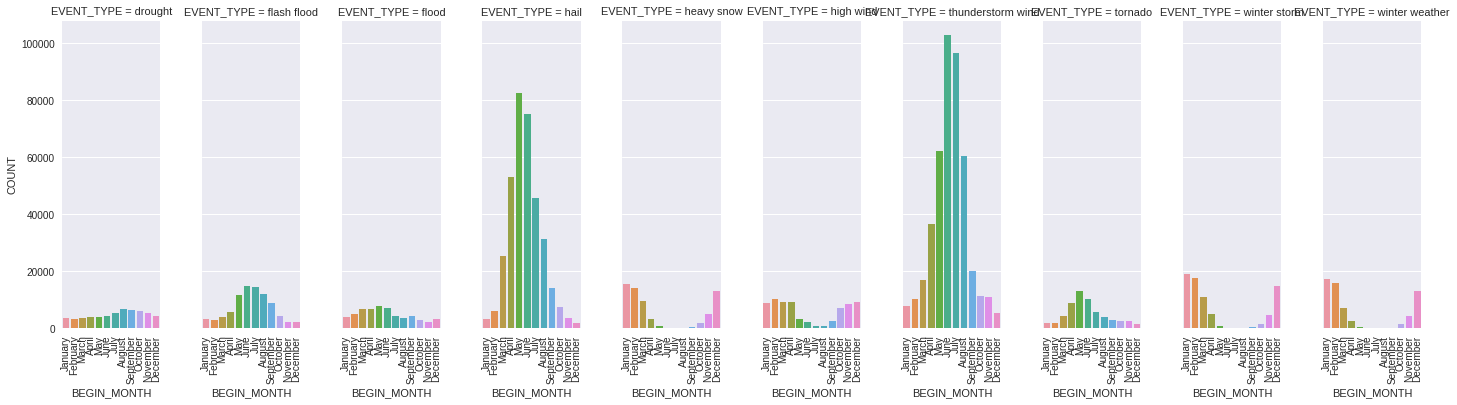

In [11]:
ordered_months = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.catplot(x='BEGIN_MONTH',y="COUNT",col="EVENT_TYPE",data=storm_month,kind="bar",orient='v',aspect=0.4,order=ordered_months).set_xticklabels(rotation=90);

We can see from the plots that the answer depends crucially from the type of event that we are analyzing. For example, the most recurrent events (*i.e.* thunderstorms and hails) have happened almost during mid-year. On the other hand, events related with snowfall commonly begin during December and end in January or February.

**How large the economic damages caused by the storms would be?**<br>
The first approach consist on plotting the evolution of total damages across time:

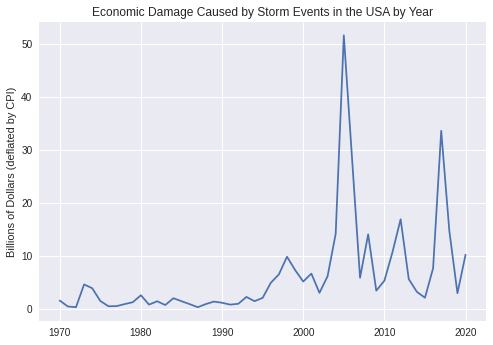

In [12]:
econ_damage = df.groupby('BEGIN_YEAR')['TOTAL_DAMAGE_DEFLATED'].sum().reset_index().set_index('BEGIN_YEAR')
econ_damage['TOTAL_DAMAGE_DEFLATED'] = econ_damage['TOTAL_DAMAGE_DEFLATED']/10**9
plt.plot(econ_damage)
plt.title('Economic Damage Caused by Storm Events in the USA by Year')
plt.ylabel('Billions of Dollars (deflated by CPI)');

Another approach to make a risk assessment of the potential damage of the storms could be plotting a scatter between the scale and the amount of damage a storm causes.

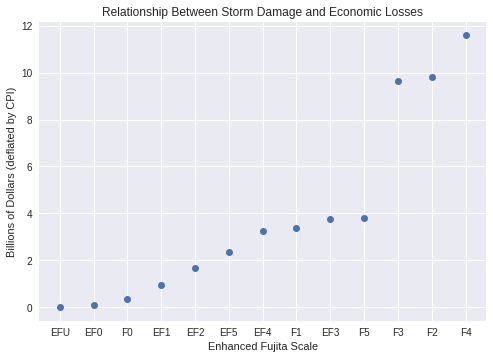

In [13]:
econ_damage = df.groupby('TOR_F_SCALE')['TOTAL_DAMAGE_DEFLATED'].sum().reset_index().sort_values('TOTAL_DAMAGE_DEFLATED')
econ_damage['TOTAL_DAMAGE_DEFLATED'] = econ_damage['TOTAL_DAMAGE_DEFLATED']/10**9
plt.plot(econ_damage['TOR_F_SCALE'],econ_damage['TOTAL_DAMAGE_DEFLATED'],'o')
plt.title('Relationship Between Storm Damage and Economic Losses')
plt.xlabel('Enhanced Fujita Scale')
plt.ylabel('Billions of Dollars (deflated by CPI)');

However, the results suggest that there is a misclassification of the `TOR_F_SCALE` variable that doesn't make too much sense with the expected result.

## The Post-Katrina Emergency Management Reform Act of 2006

### Exercise 8 (hard)

#### 8.1

Conduct a hypothesis test for each event type to assess whether there is a difference in average total damage when comparing disasters that happened before the reform to those that happened after. Keep only the event types for which you found a significant difference (using a significance threshold of $\alpha=0.01$). Since it is likely that not all events that have happened in the US are present in this dataset, we can interpret the data as being a sample (conducting hypothesis tests on population data would not make sense).

**Note:** If an event type does not have associated events either before or after the Act, ignore it and don't add it to the dictionary (since a $t$ - test won't be possible). Do not apply the Bonferroni correction in this exercise.

<details>
    <summary markdown="span">
        <br>Click here for a <b>Hint</b>
    </summary>
    <blockquote>
        Use the <a href="https://pingouin-stats.org/generated/pingouin.ttest.html"><code>.ttest()</code></a> function from the <code>pingouin</code> library.
    </blockquote>
</details>

In [14]:
df["POST_ACT"] = df["BEGIN_YEAR"] > 2006

def test_differences(df):
    """
    Conducts a t-test on TOTAL_DAMAGES comparing events
    that happened in 2006 or before with events that
    happenned after that year.
    
    Inputs:
    `df`: A pandas DataFrame
    
    Outputs:
    `p_values_signif`: A Python dictionary in which the keys are the event type
    and the values are the significant p-values that resulted from the t-test (alpha
    of 0.01)
    
    Note: If an event type does not have associated events either before or
    after the act, ignore it and don't add it to the dictionary (since a t-test
    won't be possible)
    """
      
    pre_dam  = df[df["POST_ACT"]==False][["EVENT_TYPE", "TOTAL_DAMAGE_DEFLATED"]].dropna(how="any")
    post_dam = df[df["POST_ACT"]==True][["EVENT_TYPE", "TOTAL_DAMAGE_DEFLATED"]].dropna(how="any")
    
    # YOUR CODE HERE
    # Matching the event types in both datasets:
    pre_dam  = pre_dam[pre_dam['EVENT_TYPE'].isin(post_dam['EVENT_TYPE'])]
    post_dam = post_dam[post_dam['EVENT_TYPE'].isin(pre_dam['EVENT_TYPE'])]
    
    #Creating the desired output:
    p_values_signif = {}
    
    for event in post_dam['EVENT_TYPE'].drop_duplicates():
        event_p_value = pg.ttest(pre_dam[pre_dam['EVENT_TYPE']==event]['TOTAL_DAMAGE_DEFLATED'],post_dam[post_dam['EVENT_TYPE']==event]['TOTAL_DAMAGE_DEFLATED'])['p-val'][0]
        if event_p_value <= 0.01:
            p_values_signif[event] = event_p_value
    
    return p_values_signif

In [15]:
test_differences(df)

{'heavy snow': 0.0026982967627150445,
 'drought': 3.6701241611386656e-07,
 'high surf': 0.00293151261691723,
 'flash flood': 0.0017486232578630264,
 'tornado': 0.0024748876239138315,
 'excessive heat': 1.3149098424987384e-07,
 'lake-effect snow': 1.0875854803953894e-07,
 'heavy rain': 0.0015749036964260825,
 'sleet': 5.980113292827658e-05}

#### 8.2

For these significant event types, plot their total deflated damages as box plots, comparing the pre-Act events with the post-Act events.

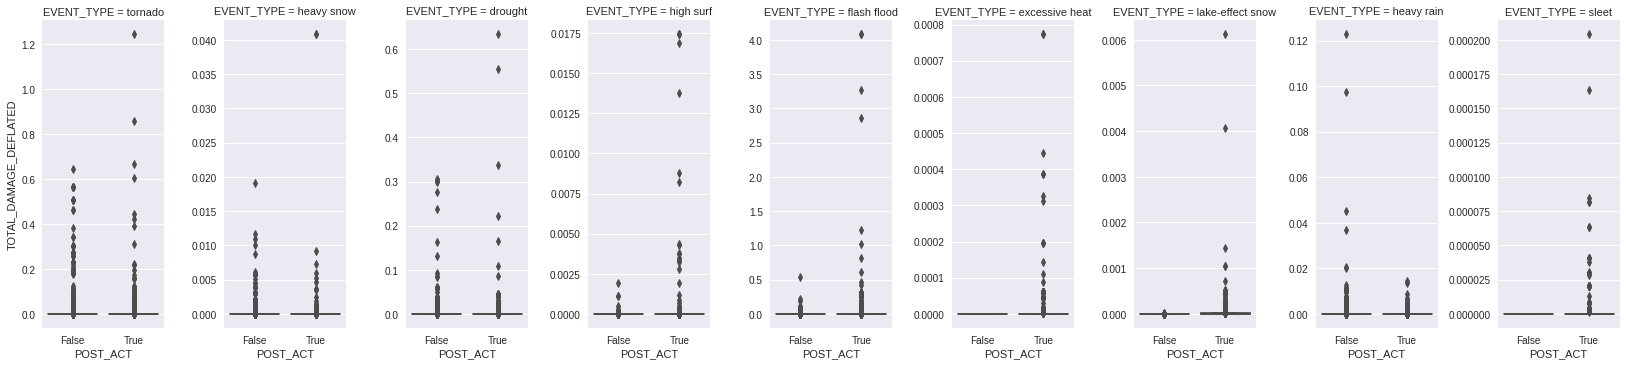

In [16]:
data_plot = df[df['EVENT_TYPE'].isin(test_differences(df).keys())][['EVENT_TYPE','TOTAL_DAMAGE_DEFLATED','POST_ACT']].copy()
data_plot['TOTAL_DAMAGE_DEFLATED'] = data_plot['TOTAL_DAMAGE_DEFLATED']/10**9
sns.catplot(x='POST_ACT',y='TOTAL_DAMAGE_DEFLATED',col='EVENT_TYPE',data=data_plot,
                   kind="box",orient='v',aspect=0.5,sharey=False);

#### 8.3

What conclusions can you draw from the hypothesis tests you have just conducted, and why?


When we state a hypothesis test we are looking to reject a null hypothesis given a certain confidence level. In common words what we're trying to do is to determine if there is any **significant** difference between two sets of observations with a small margin of error. In this particular example, what we'd like to know is if there is a difference in the total damage caused by storm events when comparing disasters that happened before and after the implementation of the Post-Katrina Emergency Management Reform Act of 2006 in USA.

The test conducted tells us that from the 62 event types included in the dataset, only 9 exhibit a **significant** difference before or after the Reform Act. The highlight of the word *significant* is crucial because it depends entirely on the assumptions made to perform the test. In this example, we only select those events which presents a p-value less than or equal to 1%, that is, we select the events whose economic damage we could say is different with a confidence of 99%. If the significance level was, say, 5%, the number of significant events would be 14.

It is also important to mention that even though there is a statistically significant difference in the damage caused by this events once the Reform Act was passed, we're not told if that difference is greater or lower than before. The test only gives us a sense of difference in the means of the variables analyzed, but it is up to us (the analysts) to determine if those differences were good to fulfill the objective of the legislation.

## Testing cells

In [17]:
# Ex. 1
ex1 = visualization_choice()
c = set()
for key in ex1.keys():
    for i in ex1[key]:
        c.add(i)
assert len(c - {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}) == 0, "Ex. 1 - It seems you included a number that is not one of the column IDs!"
assert c == {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}, "Ex. 1 - It seems you did not add a visualization for all the columns!"
print("Exercise 1 passed our preliminary screening. You will get the final grade after your TA has reviewed your submission!")

Exercise 1 passed our preliminary screening. You will get the final grade after your TA has reviewed your submission!


In [18]:
# Ex. 2
ans_2 = summary_choice().keys()
assert len(ans_2) == 2, "Ex. 2.1 - Please choose exactly two summary statistics!"
print("Exercise 2.1 passed our preliminary screening. You will get the final grade after your TA has reviewed your submission!")

Exercise 2.1 passed our preliminary screening. You will get the final grade after your TA has reviewed your submission!


In [19]:
# Ex. 4
assert len(geo_spread()) > 0, "Ex. 4 - Please choose at least one option!"
print("Exercise 4 passed our preliminary screening. You will get the final grade after your TA has reviewed your submission!")

Exercise 4 passed our preliminary screening. You will get the final grade after your TA has reviewed your submission!


In [20]:
# Ex. 8.1
import warnings
warnings.filterwarnings("ignore")
p_values_signif = test_differences(df)
assert len(p_values_signif)==9, "Ex. 8.1 - Your output seems to have the wrong number of elements! Remember to use an alpha of 0.01 (not 0.05)"
s = 0
for key in p_values_signif.keys():
    s = s+p_values_signif[key]
assert s < 0.015, "Ex. 8.1 - Your p-values are apparently too large! Remember to use an alpha of 0.01 (not 0.05)"
print("Exercise 8.1 passed our preliminary screening. You will get the final grade after your TA has reviewed your submission!")
print("Exercise 8.1 looks correct!")

Exercise 8.1 passed our preliminary screening. You will get the final grade after your TA has reviewed your submission!
Exercise 8.1 looks correct!


## Attribution

"Storm Events Database", 20 Nov 2020, National Oceanic and Atmospheric Administration, Licensed under the [Freedom of Information Act](https://www.noaa.gov/organization/information-technology/freedom-of-information-act), https://www.ncdc.noaa.gov/stormevents/ftp.jsp

"F5 tornado Elie Manitoba 2007", 22 Jun 2017, Justin Hobson, Creative Commons Attribution-Share Alike 3.0 Unported license, https://commons.wikimedia.org/wiki/File:F5_tornado_Elie_Manitoba_2007.jpg

"Historical Consumer Price Index for All Urban Consumers (CPI-U): U.S. city average, all items, index averages", March, 2021, Licensed under the [Freedom of Information Act](https://www.bls.gov/bls/blsfoia.htm), https://www.bls.gov/cpi/tables/supplemental-files/historical-cpi-u-202103.pdf (the value for 2021 corresponds to the three-month average between January and March).